In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## read data

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


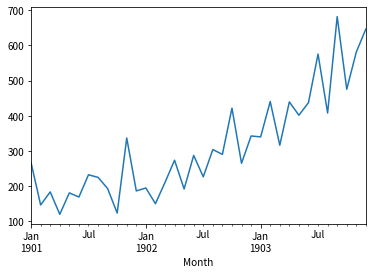

In [10]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv("shampoo-sales.csv",header=0,parse_dates=[0],index_col=0, squeeze=True, date_parser=parser)
print(series.head())
plt.figure(facecolor="white")
series.plot() # 時系列をプロット
plt.show()

## autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

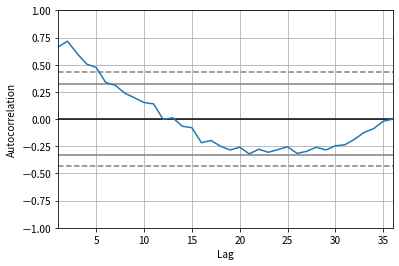

In [6]:
plt.figure(facecolor="white")
pd.plotting.autocorrelation_plot(series)

## ARIMA model

In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
model = ARIMA(series,order=(5,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 06 Dec 2020   AIC                            406.340
Time:                        10:56:03   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

<AxesSubplot:xlabel='Month'>

<Figure size 432x288 with 0 Axes>

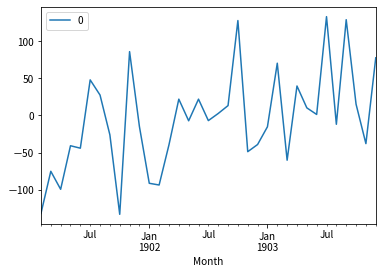

In [15]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(facecolor="white")
residuals.plot()

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

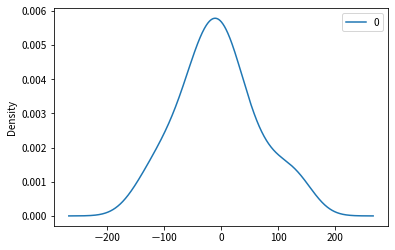

In [18]:
residuals.plot(kind='kde')

In [19]:
print(residuals.describe())

                0
count   35.000000
mean    -5.495222
std     68.132881
min   -133.296615
25%    -42.477898
50%     -7.186590
75%     24.748331
max    133.237958


predicted=349.117636, expected=342.300000
predicted=306.513009, expected=339.700000
predicted=387.376444, expected=440.400000
predicted=348.154210, expected=315.900000
predicted=386.308831, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379510, expected=437.400000
predicted=394.737284, expected=575.500000
predicted=434.915498, expected=407.600000
predicted=507.923383, expected=682.000000
predicted=435.482720, expected=475.300000
predicted=652.743779, expected=581.300000
predicted=546.343458, expected=646.900000
Test MSE: 6958.328


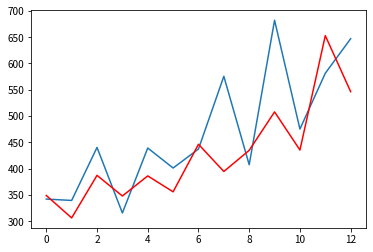

In [23]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.figure(facecolor="white")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()